# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import scipy.stats
import math

Finding min and max values

In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [5]:
temp = df['temperature']
mu = temp.mean()
std = temp.std()

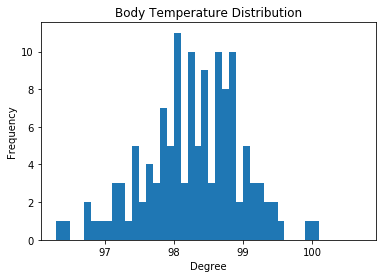

In [6]:
temp_val = df.temperature.sort_values()
bin_val = np.arange(start=temp.min(), stop=temp.max(), step= .1)
plt.hist(temp_val, bin_val)
plt.xlabel('Degree');
plt.ylabel('Frequency')
plt. title('Body Temperature Distribution')
plt.show()

By visualizing body temperature through our histogram we can already have strong estimate to a normal distribution. To have a greater confidance, we will perform a formal test in the next cell.

In [7]:
scipy.stats.normaltest(temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Our p-value does fit a normal distribution.

## 2. Is the sample size large? Are the observations independent?

In [8]:
print("Data sample size:")
len(df)

Data sample size:


130

Yes, considering the t-statistic test(n>30), which concludes that a sample greater than 30 is large and sufficient, we can determine that 130 is large.

#### Is the observation independent?

The observations are independent, the observations are random and are not consider to depend in other variables.

## 3. Is the true population mean really 98.6 degrees F?

#### objective:

compare the sample mean against the currently known human body temperature of 98.6 degrees.

#### Would you use a one-sample or two-sample test? Why?

It will be a **one-sample test:**

We are checking if a value is between the possible values of a given population parameters. We are not comparing between two groups. 

#### In this situation, is it appropriate to use the t or z statistic?

Is 98.6 degrees really the true population mean(u)?

Does the sample mean falls within a significant range of population mean?

- for our z-test we do have a normal distribution, a large enough sample size, but we lack the population's standard deviation.

In this case a t-statistic test is a better option, since we have all the needed variables:

$$t-statistic = \frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$$

<img src= "http://keydifferences.com/wp-content/uploads/2017/01/one-tailed-vs-two-tailed-test.jpg" width="400" />

<img src="https://www2.palomar.edu/users/rmorrissette/Lectures/Stats/ttests/TTable.jpg" width="400" />

In [9]:
t_score = (temp.mean() - 98.6) / (temp.std() / math.sqrt(130))
print('t-score value:', t_score)

t-score value: -5.454823292364079


When working with a two-tail t-test, we can see that the critical value for a 95% Confidence Interval and 129 degrees of freedom is $\approx 1.980$

- Our calculated sample t-value was -5.455, which is very far out from the critical range points of 1.98 and -1.98

With this, we can reject the null hypothesis estating that 98.6 degrees is the true normal mean human body temperature. There is a significant difference between out t-values.

#### Now try using the other test. How is the result be different? Why?

In [10]:
scipy.stats.ttest_1samp(temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

If we had use a **one-sample tail** instead of a two tail sample, the results would had only give us one dirrection of probability and could of cause a misleading or bias value. We needed to use a two-tail sample since the objective is to find the mean population for human body temperature  of 98.6 is too high or low. Our p-value would had been split in half to 2.5% chance to reject our hypothesis from only a one side direction of the mean population. 

Another test that could have been use, was to estimate the z-value:


In order for us to use the z-test we need to have a sample > 30 and know the population standard deviation. As we have seen, the population's standard deviation is missing; For this, we can estimate the population's standard deviation using our sample standard deviation as long as our sample size is greater than 30 (n>30), which in this case it is.

$$Z-test = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

#### Change from population's standard deviation to sample standard deviation to get an estimate(Ok, if n>30):


$$Z-test \approx \frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$$


In [11]:
z_estimate = (temp.mean() - 98.6) / (temp.std() / math.sqrt(130))
print('z_estimate: ', z_estimate)

z_estimate:  -5.454823292364079


## 4. At what temperature should we consider someone's temperature to be "abnormal"?

#### Start by computing the margin of error and confidence interval:

Using the t-table above with with a 95% confidence interval, and intervals below -1.96 and above 1.96 to be the border lines of abnormality.

In [12]:
scipy.stats.norm.interval(0.95, temp.mean(), temp.std()/math.sqrt(130))

(98.123196428181657, 98.375265110279898)

below 98.12 and above 98.4 would be consider abnormal

## 5. Is there a significant difference between males and females in normal temperature?

#### What test did you use and why?

We are tryint to compare weather the averages of two groups have a significant defference, and we have two different groups; males and females, so we will work with a Two Sample t-test

Our null hypothesis will be:

- Male normal temperature  = Female normal temperature

Are they the same?

**or**

Alternitive hypothesis:

- Male normal temperature $\neq$ Female normal temperature

Do they have a signifficant defference?

In [37]:
male_s = df[df['gender'] == 'M']
female_s = df[df['gender'] == 'F']

In [27]:
male_s.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [28]:
female_s.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [40]:
male_temp = male_s.temperature
female_temp = female_s.temperature

We are going to decide on a signifficance level of 95% or (alpha) marging error of 5%:

 
- if there is less than a 5% probability of getting a difference in mean of 0.2892, we are going to reject the null hypothesis.

The null hypothesis say tha the mean difference should be equal to zero or (0.2892)

- There is a critical value or border line, that the probability of obtainin a sample from the distribution is 5%.
we need to find out what that value is, and if that value is larger than our critical value(0.2892), we can reject the null hypothesis. The probability of getting (0.2892) is less than 5%.

#### difference in mean:

What is the probability of getting this number?


In [61]:
diff_mean = female_temp.mean() - male_temp.mean() 
diff_mean

0.289230769230727

Assuming that the Null Hypothesis is correct, what is the probability of getting 0.2892?

- If that probability of getting 0.2892 is below 5%, we are going to reject the null hypothesis, and accept the alternitive hypothesis, assuming that the male and female temperature significally varies.
- Assuming that the null hypothesis is correct we want no more than a 5% chance of getting 0.2892, if there is less than a 5% probability of getting 0.2892, we are going to reject the null hypothesis and favor the alternative

**What is the critical value which determines the probability of getting a sample from the distribution above that  critical value to be only 5%(-2.5%,2.5%) two-tail?**

- If our value(0.2892) is larger than that value than that means that is on that 5%(-2.5%,2.5%) range, and we can reject the null hypothesis
- In order for us to find that critical value, we need to use the above t-table and find the needed variance and degrees of freedom.

**estimate variance:**

In [73]:
# estimate variance(We don't have population standard deviation)

variance = (male_temp.std()**2/65) + (female_temp.std()**2/65)
variance

0.016015902366863885

** Degrees of freedom:**

In [74]:
dgr_frdm = variance**2/((male_temp.std()**2/65)**2/(65-1) + (female_temp.std()**2/65)**2/(65-1))
dgr_frdm

127.5103008303909

Looking to our t-table above, we see how the **two-tail critical value** for a **95% confidence interval** and **degrees freedom of 127** is around **1.980**

- This means that the distance from our value of .2892 is 1.980 standard deviations from the mean

**What is our standard deviation, of the difference of the means(0.2892)?**

In [86]:
variance

0.016015902366863885

So the distance from the (0.2892) to the critical point 1.980 is:

In [89]:
(1.980 * variance)

0.03171148668639049

if we assume that the temperatures of males and females are the same, there is only a 5% chance that the means of these two samples to have a difference of more than 0.0317

The mean that we obtained was 0.2892, which is over the 0.0317.

So the probability of getting 0.2892, assuming that the null hypothesis is correct is less than 5%(our significant level).

Base of this **we can reject the null hypothesis** which was said that males and females have the same body temperature, **and accept the alternative** which define that the temperature between these two groups vary.

**Marging Error:**

In [79]:
marg_err = math.sqrt(male_temp.var() + female_temp.var())
marg_err

1.0203105673500361

**Is the difference in means(.2892) above the standard error?**

In [85]:
1.980 * variance

0.03171148668639049

Assuming that the temperatures are the same, there is only a 5% chance that the means of these samples have a difference of more than .0316

Our difference in means is .2892, which is greater than .0316 and falls within the 5% chance region.

In other words, there is 95% significant chance that there is a difference in means, and 5% chance they are the same.

**With this, we can reject the null hypothesis that their temperatures are the same**

and

** Accept that the body temperature between males and females vary from each other**

In [83]:
scipy.stats.ttest_ind(male_temp, female_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)